# Project Three Notebook - MLB Hall of Fame Predictor
By: Justin Martino 
For my project I found the 2022 ballot for the MLB Hall of fame. The ballot includes 133 current and former MLB players who will be eligible for the Hall of Fame ballot in 2022. Originally, I looked at the 2018 ballot but that ballot had under 100 names and could not be used for this project. Baseball is a heavily statistical driven sport. Today, teams are using statistics everyday to evaluate a players value. 
 


## WAR, WAR7, JAWS
For my project I used WAR, WAR7, and JAWS as my classifiers to help predict whether a given player is likely or unlikely to be inducted into the Hall of Fame. The WAR statistic is the value that a given player adds to a team above the replacement. The statistic literally stands for Wins Above Replacement. Thus, the statistic signifies the number of wins a player added. In addition, WAR7 is the sum of the seven best WAR seasons a player had. Lastly, JAWS is a combination of career and 7-year peak WAR totals. I found my statistics here: [https://www.baseball-reference.com/awards/hof_2022.shtml].


## PREDICTION: 
 I used the JAWS statistic as a pretty good indicator of a players chances of getting to the hall of fame. From looking at the statistics, I found that the cutoff point was greater than or equal to a JAWS of 50.

## RESULTS:
From the regression that I ran I had some very interesting results. First, from my calculation I found that 11% of the ballot had a likely chance of getting into the Hall of Fame. My regression was 86% accurate. Below are the results of my regression, which are also located at the bottom of this code. 
Logistic Regression
Accuracey: 0.857142857143

True Negatives: 5
False Positives: 0
False Negatives: 1
True Positives: 1
Recall: 1.0
Precision: 0.5
F1 Score: 0.666666666667

Decision Tree
Accuracey: 1.0

True Negatives: 5
False Positives: 0
False Negatives: 0
True Positives: 2
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Random Forest
Accuracey: 1.0

## THE PROCESS
During the course of this project I switched what I would use for a data set multiple times. Originally, I was looking at data sets from the data.gov website but I could not find a data set that really intrigued me. I have always really been a big fan of the way statistics are used in baseball. Through an MLB season teams use statistics to determine who to play on their team and how to use those players. Therefore, I decided to try to use statistics for my regression. Originally, I used a data set that had a mix of players that were already in the Hall of Fame and players that were playing or retired and just not in the Hall. However, I realized that I could not use this set to make a prediction because some players were already in the Hall of Fame. From here, I decided to look into the 2018 ballot of potential MLB hall of famers. However, this data set was too small so I moved on to the 2022 ballot which had a larger number of players, which was better for my project. 

This is where we load libraires and the like so we can do what we need. If you get an error saying a module is not loaded, open a new terminal/cmd line and try running: `pip install [module name]`. 

In [22]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import random

# Custom functions
def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

## Data Cleaning

Here we load the data we collected and get it all ready to feed to our statistical model(s). That is, we are trying to make a table with one **target** column and one or more **features**. 


In [23]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv('2022HOF.csv', parse_dates=[0]) 
raw_data_df.head()

,Rk,Name,WAR,WAR7,JAWS
0,1,Trevor Hoffman,28.4,19.6,24.0
1,2,Vladimir Guerrero,59.3,41.1,50.2
2,3,Roger Clemens,140.3,66.3,103.3
3,4,Barry Bonds,162.4,72.7,117.6
4,5,Mike Mussina,83.0,44.5,63.8


In [24]:
# I created a new column to measure the likelihood of entering the HAll of Fame
raw_data_df["HOF"] = "N"
raw_data_df.head()

,Rk,Name,WAR,WAR7,JAWS,HOF
0,1,Trevor Hoffman,28.4,19.6,24.0,N
1,2,Vladimir Guerrero,59.3,41.1,50.2,N
2,3,Roger Clemens,140.3,66.3,103.3,N
3,4,Barry Bonds,162.4,72.7,117.6,N
4,5,Mike Mussina,83.0,44.5,63.8,N


In [25]:
# Here i modified the column to gauge if JAWS was over 50. If so, it would be notes as likely.
raw_data_df.loc[raw_data_df["JAWS"] >= 50, "HOF"] = "Y"
raw_data_df.head()

,Rk,Name,WAR,WAR7,JAWS,HOF
0,1,Trevor Hoffman,28.4,19.6,24.0,N
1,2,Vladimir Guerrero,59.3,41.1,50.2,Y
2,3,Roger Clemens,140.3,66.3,103.3,Y
3,4,Barry Bonds,162.4,72.7,117.6,Y
4,5,Mike Mussina,83.0,44.5,63.8,Y


In [26]:
# I am now going make classifiers where the target is a class.
HOF_class_df = raw_data_df[[
                            'HOF',
                            'WAR',
                            'WAR7',
                            'JAWS'
                             ]].copy()
HOF_class_df.head()

,HOF,WAR,WAR7,JAWS
0,N,28.4,19.6,24.0
1,Y,59.3,41.1,50.2
2,Y,140.3,66.3,103.3
3,Y,162.4,72.7,117.6
4,Y,83.0,44.5,63.8


# Change Below

If your csv file was already just your target and features, the only cell you'd need to change is the one below. Specificly, you'll be changing **`satisfied_Y_N`** to the name of your target column. 

Percentage of Ys: 0.1111111111111111



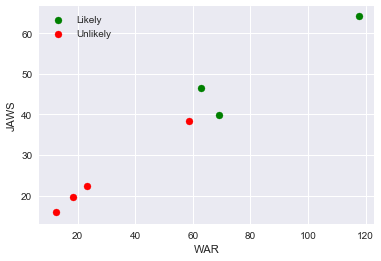

In [21]:
data = HOF_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("HOF", axis=1).as_matrix(columns=None)
labels_train = training["HOF"].as_matrix(columns=None)

features_test = holdout.drop("HOF", axis=1).as_matrix(columns=None)
labels_test = holdout["HOF"].as_matrix(columns=None)

# What percentage of the time is target Yes?
print("Percentage of Ys: %s\n"%(len(data[data["HOF"]=="Y"])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Likely")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Unlikely")
plt.legend()
plt.xlabel("WAR")
plt.ylabel("JAWS")
plt.show()


In [20]:
# Logistic Regression
model = LogisticRegression(fit_intercept = False, C = 1e9)
clf = model.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Logistic Regression")
evaluate(pred, labels_test)  

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("\nDecision Tree")
evaluate(pred, labels_test)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Random Forest")
evaluate(pred, labels_test)  

from sklearn.svm import SVC
clf = SVC(kernel="rbf",probability=True)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("SVM")
evaluate(pred, labels_test)  

Logistic Regression
Accuracey: 0.857142857143

True Negatives: 5
False Positives: 0
False Negatives: 1
True Positives: 1
Recall: 1.0
Precision: 0.5
F1 Score: 0.666666666667

Decision Tree
Accuracey: 1.0

True Negatives: 5
False Positives: 0
False Negatives: 0
True Positives: 2
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Random Forest
Accuracey: 1.0

True Negatives: 5
False Positives: 0
False Negatives: 0
True Positives: 2
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
SVM
Accuracey: 0.857142857143

True Negatives: 5
False Positives: 0
False Negatives: 1
True Positives: 1
Recall: 1.0
Precision: 0.5
F1 Score: 0.666666666667
